<a href="https://colab.research.google.com/github/farahfauziahsavitri/farahfauziahsavitri/blob/main/ENSO_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSTM

In [ ]:
from google.colab import drive
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/My Drive/KMMI/enso.csv',usecols=[0],engine='python')
np.random.seed(42)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,enso
0,-1.5
1,-1.3
2,-1.2
3,-1.2
4,-1.1


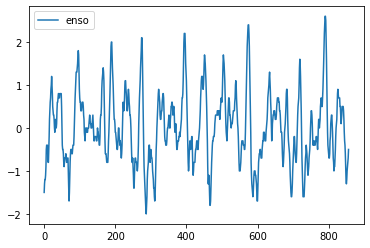

In [ ]:
df.plot()

In [ ]:
#change the data type
df = df.values
df=df.astype('float32')

#normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)

#split into train and test sets
train_size = int(len(df)*0.67)
test_size = len(df) - train_size
train,test = df[0:train_size,:], df[train_size:len(df),:]
print(len(train),len(test))

574 283


In [ ]:
#convert an array of values into a dataset matrix
def create_dataset(df, look_back=1):
  dataX, dataY = [], []
  for i in range(len(df)-look_back-1):
    a = df[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(df[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
#reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#reshape input to be [samples,time stemps, features]
trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [ ]:
#create the LSTM network
model=Sequential()
model.add(LSTM(4,input_shape=(1,look_back)))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 96        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile and fit the model
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=100,batch_size=1,verbose=2)

Epoch 1/100
572/572 - 20s - loss: 0.0584
Epoch 2/100
572/572 - 1s - loss: 0.0159
Epoch 3/100
572/572 - 1s - loss: 0.0094
Epoch 4/100
572/572 - 1s - loss: 0.0044
Epoch 5/100
572/572 - 1s - loss: 0.0023
Epoch 6/100
572/572 - 1s - loss: 0.0019
Epoch 7/100
572/572 - 1s - loss: 0.0019
Epoch 8/100
572/572 - 1s - loss: 0.0019
Epoch 9/100
572/572 - 1s - loss: 0.0019
Epoch 10/100
572/572 - 1s - loss: 0.0019
Epoch 11/100
572/572 - 1s - loss: 0.0019
Epoch 12/100
572/572 - 1s - loss: 0.0019
Epoch 13/100
572/572 - 1s - loss: 0.0019
Epoch 14/100
572/572 - 1s - loss: 0.0019
Epoch 15/100
572/572 - 1s - loss: 0.0019
Epoch 16/100
572/572 - 1s - loss: 0.0019
Epoch 17/100
572/572 - 1s - loss: 0.0019
Epoch 18/100
572/572 - 1s - loss: 0.0019
Epoch 19/100
572/572 - 1s - loss: 0.0019
Epoch 20/100
572/572 - 1s - loss: 0.0019
Epoch 21/100
572/572 - 1s - loss: 0.0019
Epoch 22/100
572/572 - 1s - loss: 0.0019
Epoch 23/100
572/572 - 1s - loss: 0.0019
Epoch 24/100
572/572 - 1s - loss: 0.0019
Epoch 25/100
572/572 - 1

In [ ]:
#make predictios
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

#invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict=scaler.inverse_transform(testPredict)
testY=scaler.inverse_transform([testY])

#calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print('Train Score: %.2f RMSE'%(trainScore))
testScore = math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print('Test Score: %.2f RMSE'%(testScore))

Train Score: 0.20 RMSE
Test Score: 0.21 RMSE


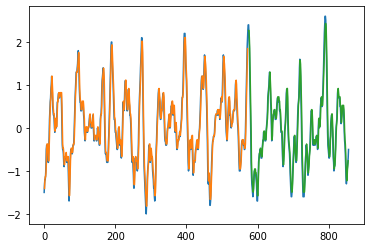

In [ ]:
#shift train predictions for plotting
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:]=trainPredict

#shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1,:]=testPredict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()